In [1]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string



In [4]:


# Tạo dữ liệu theo yêu cầu
data = {
    'text': [
        'Subject: Giảm giá đặc biệt dịp cuối năm!',
        'Cảnh báo bảo mật hệ thống \n Vui lòng kiểm tra.',
        'Thông báo: Lịch bảo trì hệ thống'
    ]
}

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Lưu DataFrame vào file CSV (sau khi tạo dữ liệu)
df.to_csv('data.csv', index=False)

# Bước 1: Đọc lại dữ liệu từ file CSV
df = pd.read_csv('data.csv')




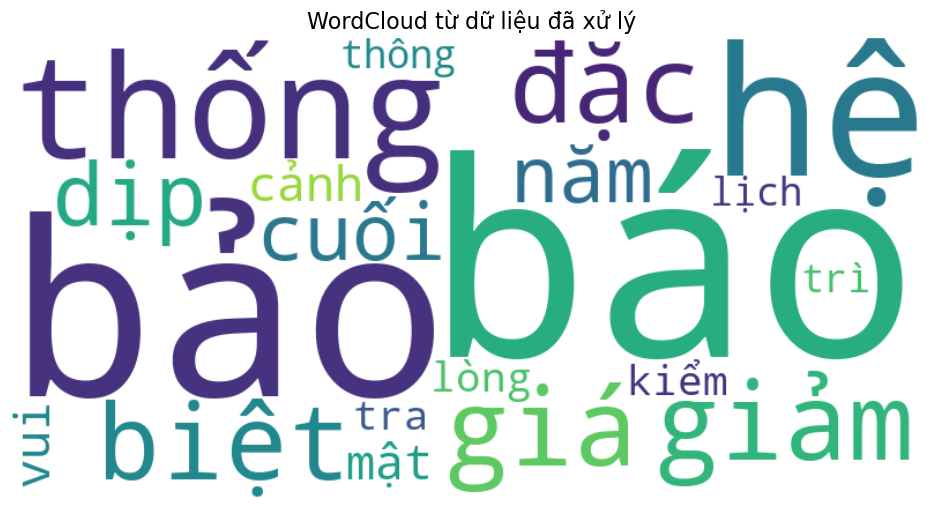

In [5]:
# Bước 1: Đọc dữ liệu
df = pd.read_csv('data.csv')

# Bước 2: Tiền xử lý văn bản
def clean_text(text):
    text = re.sub(r'^Subject:\s*', '', text, flags=re.IGNORECASE)  # Loại bỏ "Subject:" ở đầu dòng
    text = text.replace('\r', '').replace('\n', ' ')  # Thay thế ký tự xuống dòng bằng khoảng trắng
    text = re.sub(r'[^\sa-zA-ZÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂưạảấầẩẫậắằẳẵặẹẻẽềềểỄỆỈỊỌỎỐỒỔỖỘỚỜỞỠỢỤỦỨỪễệỉịọỏốồổỗộớờởỡợụủứừỬỮỰỲỴÝỶỸửữựỳỵỷỹ]', '', text)  # Loại bỏ ký tự không phải chữ cái và khoảng trắng
    text = text.lower()  # Chuyển về chữ thường
    text = re.sub(r'\s+', ' ', text).strip()  # Loại bỏ khoảng trắng thừa

    return text

df['cleaned'] = df['text'].astype(str).apply(clean_text)
text = ' '.join(df['cleaned'])

# Bước 3: Tạo và hiển thị WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud từ dữ liệu đã xử lý', fontsize=16)
plt.show()

In [6]:
import pandas as pd

# Dữ liệu ví dụ về Jon Snow từ Game of Thrones
data2 = {
    'text': [
        'Sy dep trai.',
        'Sy dep trai.',
        'Sy dep trai.',
        'Sy dep trai.',
        'Jon Snow is known for his courage and loyalty.',
        'Jon Snow joins the Night\'s Watch.',
        'Jon Snow becomes the Lord Commander of the Night\'s Watch.',
        'Jon Snow fights the White Walkers beyond the Wall.',
        'Jon Snow\'s true parentage is revealed.',
        'Jon Snow has a complicated relationship with Daenerys Targaryen.'
    ]
}

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data2)

# Lưu dữ liệu vào file CSV
df.to_csv('Game_of_Thrones_jon_snow_data.csv', index=False)

# Kiểm tra file đã được tạo
print('File Game_of_Thrones_jon_snow_data.csv đã được tạo thành công!')


File Game_of_Thrones_jon_snow_data.csv đã được tạo thành công!


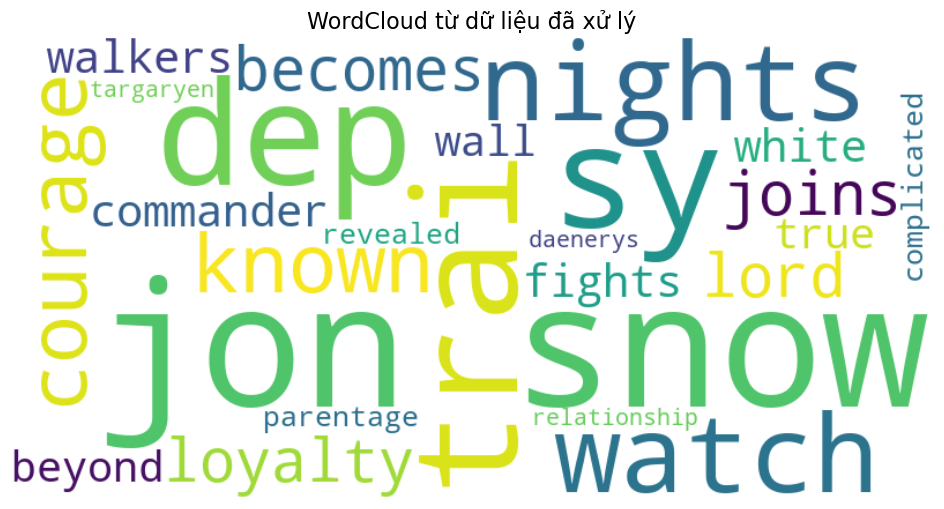

In [7]:


# Danh sách các ký tự tiếng Việt cần giữ lại
vietnamese_letters = 'ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂưạảấầẩẫậắằẳẵặẹẻẽềềểỄỆỈỊỌỎỐỒỔỖỘỚỜỞỠỢỤỦỨỪễệỉịọỏốồổỗộớờởỡợụủứừỬỮỰỲỴÝỶỸửữựỳỵỷỹ'

# Kết hợp lại thành một biểu thức chính quy
def clean_text(text):
    # Loại bỏ "Subject:" ở đầu dòng
    text = re.sub(r'^Subject:\s*', '', text, flags=re.IGNORECASE)  
    # Loại bỏ ký tự xuống dòng và thay thế bằng khoảng trắng
    text = text.replace('\r', '').replace('\n', ' ')  
    # Loại bỏ ký tự không phải chữ cái và khoảng trắng, giữ lại các ký tự tiếng Việt
    allowed_chars = string.ascii_letters + vietnamese_letters + ' '  # Chữ cái và khoảng trắng
    text = re.sub(rf'[^{re.escape(allowed_chars)}]', '', text)  # Loại bỏ tất cả các ký tự không nằm trong allowed_chars
    text = text.lower()  # Chuyển về chữ thường
    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Bước 1: Đọc dữ liệu
df = pd.read_csv('Game_of_Thrones_jon_snow_data.csv')

# Bước 2: Tiền xử lý văn bản
df['cleaned'] = df['text'].astype(str).apply(clean_text)
text = ' '.join(df['cleaned'])

# Bước 3: Tạo và hiển thị WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud từ dữ liệu đã xử lý', fontsize=16)
plt.show()
